In [1]:
import requests
import json
import matplotlib.pyplot as plt
import re
import string
import jieba
import jieba.analyse
from wordcloud import WordCloud

In [2]:
token = '<token>'
begin = 1489536000
end = 1521072000
#curl the page of chu chen #given time range #limit100
res = requests.get("https://graph.facebook.com/v2.3/kikuChen?fields=posts.since(" + str(begin) + ").until(" + str(end) + ").limit(100)&created_time&message&access_token=%s"%(token))
jsondata = json.loads(res.text)

In [3]:
#data cleaning
dat = jsondata['posts']['data']
posts = []
for m in dat:
    if 'message' in m:
        posts.append(m['message'])
posts = ''.join(map(str, posts))
posts = re.sub('['+string.punctuation+']', '', posts)
posts = re.sub(r'[a-zA-Z0-9！？?〞＃●＄％《❤。＆’（）＊＋｜※，－╱︰；＜＝＞＠〔╲〕　＿ˋ｛∣｝∼?????、〃》「」『』【】﹝﹞【】?????〝〞????–—‘’?“”??…?﹏.：]+', '', posts)

In [4]:
#cut words
jieba.load_userdict('D:\CSXdata\dict\mydict.dic')
jieba.add_word('高雄')
word_list = ' '.join(jieba.cut(posts, cut_all = False, HMM = False))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\OLIVIA~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.622 seconds.
Prefix dict has been built succesfully.


In [5]:
#extract the most important 200 words
jieba.analyse.set_stop_words('D:\CSXdata\dict\mystop.txt')
word_list = jieba.analyse.extract_tags(word_list, topK = 200, withWeight = False, allowPOS = ())
word_list = ' '.join(word_list)

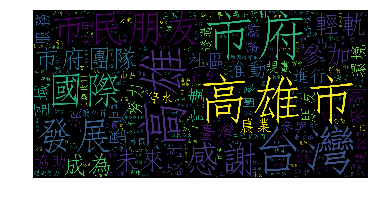

In [6]:
#generate wordcloud
font = r'C:\Windows\Fonts\simfang.ttf'
wordcloud = WordCloud( font_path = font, background_color="black", width=1600, height=800).generate( word_list )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()